In [1]:
import numpy as np 
import pandas as pd
import random
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import t
from scipy.interpolate import interp1d
from scipy.stats import chi2_contingency

In [2]:
df=pd.read_excel('project_data.xlsx')

In [3]:
df

,timestamp,Gender,type,why_veg,pof,taste,fav_cuisine_ind,fav _cuisine_foreign,adven,dine_out,cost,dessert
0,2024-04-17 20:26:50.873,Male,Non-Vegetarian,Taste,South India,Spicy,South Indian Cuisine,"Italian Cuisine, Chinese Cuisine",5,3,₹1000 - ₹2000,"Yes, I love having dessert after every meal."
1,2024-04-17 20:27:44.803,Male,Vegetarian,Religious Believes,South India,"Spicy, Umami",North Indian Cuisine,"Italian Cuisine, Chinese Cuisine, Mexican Cuisine",7,1,Less than ₹1000,"Yes, I love having dessert after every meal."
2,2024-04-17 20:28:27.020,Male,Non-Vegetarian,Taste,South India,Spicy,North Indian Cuisine,Italian Cuisine,6,4,₹2000 - ₹3000,"Occasionally, depending on the occasion."
3,2024-04-17 20:29:17.465,Male,Vegetarian,Taste,South India,"Sweet, Salty, Spicy, Sour, Umami",South Indian Cuisine,"Italian Cuisine, Chinese Cuisine, Mexican Cuisine",8,2,₹2000 - ₹3000,"Yes, I love having dessert after every meal."
4,2024-04-17 20:31:19.138,Female,Non-Vegetarian,Taste,North India,"Sweet, Umami",North Indian Cuisine,"Japanese Cuisine, Mexican Cuisine",2,4,More than ₹5000,"Occasionally, depending on the occasion."
...,...,...,...,...,...,...,...,...,...,...,...,...
218,2024-04-19 19:59:56.280,Male,Vegetarian,Taste,North India,Spicy,North Indian Cuisine,Italian Cuisine,5,3,₹3000 - ₹5000,"Occasionally, depending on the occasion."
219,2024-04-19 20:13:02.182,Male,Non-Vegetarian,Taste,North India,"Sweet, Salty, Spicy, Sour",North Indian Cuisine,"Italian Cuisine, Chinese Cuisine",8,2,₹1000 - ₹2000,"Occasionally, depending on the occasion."
220,2024-04-19 23:44:46.157,Male,Vegetarian,Religious Believes,North India,"Sweet, Salty, Spicy",North Indian Cuisine,Chinese Cuisine,4,4,₹2000 - ₹3000,"Yes, I love having dessert after every meal."
221,2024-04-20 01:58:00.053,Female,Vegetarian,Allergic to non-veg,North India,"Salty, Spicy, Sour",North East Cuisine,Japanese Cuisine,5,3,₹3000 - ₹5000,"No, I usually skip dessert after meals."


In [4]:
def map_cost_range(cost_range):
    if cost_range == '1000':
        return '500-1000'
    elif cost_range == '5000':
        return '5000-7000'
    else:
        return cost_range

In [5]:
# Remove the rupee symbol and any other non-numeric characters
df['cost'] = df['cost'].str.replace('₹', '').str.replace(',', '').str.replace('Less than ', '').str.replace('More than ', '')
df['updated_cost_range'] = df['cost'].apply(map_cost_range)
df

,timestamp,Gender,type,why_veg,pof,taste,fav_cuisine_ind,fav _cuisine_foreign,adven,dine_out,cost,dessert,updated_cost_range
0,2024-04-17 20:26:50.873,Male,Non-Vegetarian,Taste,South India,Spicy,South Indian Cuisine,"Italian Cuisine, Chinese Cuisine",5,3,1000 - 2000,"Yes, I love having dessert after every meal.",1000 - 2000
1,2024-04-17 20:27:44.803,Male,Vegetarian,Religious Believes,South India,"Spicy, Umami",North Indian Cuisine,"Italian Cuisine, Chinese Cuisine, Mexican Cuisine",7,1,1000,"Yes, I love having dessert after every meal.",500-1000
2,2024-04-17 20:28:27.020,Male,Non-Vegetarian,Taste,South India,Spicy,North Indian Cuisine,Italian Cuisine,6,4,2000 - 3000,"Occasionally, depending on the occasion.",2000 - 3000
3,2024-04-17 20:29:17.465,Male,Vegetarian,Taste,South India,"Sweet, Salty, Spicy, Sour, Umami",South Indian Cuisine,"Italian Cuisine, Chinese Cuisine, Mexican Cuisine",8,2,2000 - 3000,"Yes, I love having dessert after every meal.",2000 - 3000
4,2024-04-17 20:31:19.138,Female,Non-Vegetarian,Taste,North India,"Sweet, Umami",North Indian Cuisine,"Japanese Cuisine, Mexican Cuisine",2,4,5000,"Occasionally, depending on the occasion.",5000-7000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
218,2024-04-19 19:59:56.280,Male,Vegetarian,Taste,North India,Spicy,North Indian Cuisine,Italian Cuisine,5,3,3000 - 5000,"Occasionally, depending on the occasion.",3000 - 5000
219,2024-04-19 20:13:02.182,Male,Non-Vegetarian,Taste,North India,"Sweet, Salty, Spicy, Sour",North Indian Cuisine,"Italian Cuisine, Chinese Cuisine",8,2,1000 - 2000,"Occasionally, depending on the occasion.",1000 - 2000
220,2024-04-19 23:44:46.157,Male,Vegetarian,Religious Believes,North India,"Sweet, Salty, Spicy",North Indian Cuisine,Chinese Cuisine,4,4,2000 - 3000,"Yes, I love having dessert after every meal.",2000 - 3000
221,2024-04-20 01:58:00.053,Female,Vegetarian,Allergic to non-veg,North India,"Salty, Spicy, Sour",North East Cuisine,Japanese Cuisine,5,3,3000 - 5000,"No, I usually skip dessert after meals.",3000 - 5000


In [6]:
# Split the cost range into minimum and maximum values
df[['min_cost', 'max_cost']] = df['updated_cost_range'].str.split('-', expand=True)

# Convert min_cost and max_cost to numeric
df['min_cost'] = pd.to_numeric(df['min_cost'], errors='coerce')  # 'coerce' to handle non-numeric values as NaN
df['max_cost'] = pd.to_numeric(df['max_cost'], errors='coerce')  # 'coerce' to handle non-numeric values as NaN

In [7]:
df

,timestamp,Gender,type,why_veg,pof,taste,fav_cuisine_ind,fav _cuisine_foreign,adven,dine_out,cost,dessert,updated_cost_range,min_cost,max_cost
0,2024-04-17 20:26:50.873,Male,Non-Vegetarian,Taste,South India,Spicy,South Indian Cuisine,"Italian Cuisine, Chinese Cuisine",5,3,1000 - 2000,"Yes, I love having dessert after every meal.",1000 - 2000,1000,2000
1,2024-04-17 20:27:44.803,Male,Vegetarian,Religious Believes,South India,"Spicy, Umami",North Indian Cuisine,"Italian Cuisine, Chinese Cuisine, Mexican Cuisine",7,1,1000,"Yes, I love having dessert after every meal.",500-1000,500,1000
2,2024-04-17 20:28:27.020,Male,Non-Vegetarian,Taste,South India,Spicy,North Indian Cuisine,Italian Cuisine,6,4,2000 - 3000,"Occasionally, depending on the occasion.",2000 - 3000,2000,3000
3,2024-04-17 20:29:17.465,Male,Vegetarian,Taste,South India,"Sweet, Salty, Spicy, Sour, Umami",South Indian Cuisine,"Italian Cuisine, Chinese Cuisine, Mexican Cuisine",8,2,2000 - 3000,"Yes, I love having dessert after every meal.",2000 - 3000,2000,3000
4,2024-04-17 20:31:19.138,Female,Non-Vegetarian,Taste,North India,"Sweet, Umami",North Indian Cuisine,"Japanese Cuisine, Mexican Cuisine",2,4,5000,"Occasionally, depending on the occasion.",5000-7000,5000,7000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218,2024-04-19 19:59:56.280,Male,Vegetarian,Taste,North India,Spicy,North Indian Cuisine,Italian Cuisine,5,3,3000 - 5000,"Occasionally, depending on the occasion.",3000 - 5000,3000,5000
219,2024-04-19 20:13:02.182,Male,Non-Vegetarian,Taste,North India,"Sweet, Salty, Spicy, Sour",North Indian Cuisine,"Italian Cuisine, Chinese Cuisine",8,2,1000 - 2000,"Occasionally, depending on the occasion.",1000 - 2000,1000,2000
220,2024-04-19 23:44:46.157,Male,Vegetarian,Religious Believes,North India,"Sweet, Salty, Spicy",North Indian Cuisine,Chinese Cuisine,4,4,2000 - 3000,"Yes, I love having dessert after every meal.",2000 - 3000,2000,3000
221,2024-04-20 01:58:00.053,Female,Vegetarian,Allergic to non-veg,North India,"Salty, Spicy, Sour",North East Cuisine,Japanese Cuisine,5,3,3000 - 5000,"No, I usually skip dessert after meals.",3000 - 5000,3000,5000


In [8]:


# Generate random numbers within each range
def generate_random_cost(row):
    if pd.isna(row['min_cost']):
        return random.randint(row['max_cost'], row['max_cost'] * 2)  # Random number more than max_cost
    elif pd.isna(row['max_cost']):
        return random.randint(0, row['min_cost'])  # Random number less than min_cost
    else:
        return random.randint(row['min_cost'], row['max_cost'])

df['random_cost'] = df.apply(generate_random_cost, axis=1)

# Drop the unnecessary columns if needed
df.drop(columns=['min_cost', 'max_cost'], inplace=True)

df.loc[df['pof'].str.contains('Northeast'), 'pof'] = 'North India'

df



,timestamp,Gender,type,why_veg,pof,taste,fav_cuisine_ind,fav _cuisine_foreign,adven,dine_out,cost,dessert,updated_cost_range,random_cost
0,2024-04-17 20:26:50.873,Male,Non-Vegetarian,Taste,South India,Spicy,South Indian Cuisine,"Italian Cuisine, Chinese Cuisine",5,3,1000 - 2000,"Yes, I love having dessert after every meal.",1000 - 2000,1070
1,2024-04-17 20:27:44.803,Male,Vegetarian,Religious Believes,South India,"Spicy, Umami",North Indian Cuisine,"Italian Cuisine, Chinese Cuisine, Mexican Cuisine",7,1,1000,"Yes, I love having dessert after every meal.",500-1000,834
2,2024-04-17 20:28:27.020,Male,Non-Vegetarian,Taste,South India,Spicy,North Indian Cuisine,Italian Cuisine,6,4,2000 - 3000,"Occasionally, depending on the occasion.",2000 - 3000,2557
3,2024-04-17 20:29:17.465,Male,Vegetarian,Taste,South India,"Sweet, Salty, Spicy, Sour, Umami",South Indian Cuisine,"Italian Cuisine, Chinese Cuisine, Mexican Cuisine",8,2,2000 - 3000,"Yes, I love having dessert after every meal.",2000 - 3000,2501
4,2024-04-17 20:31:19.138,Female,Non-Vegetarian,Taste,North India,"Sweet, Umami",North Indian Cuisine,"Japanese Cuisine, Mexican Cuisine",2,4,5000,"Occasionally, depending on the occasion.",5000-7000,6373
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218,2024-04-19 19:59:56.280,Male,Vegetarian,Taste,North India,Spicy,North Indian Cuisine,Italian Cuisine,5,3,3000 - 5000,"Occasionally, depending on the occasion.",3000 - 5000,3190
219,2024-04-19 20:13:02.182,Male,Non-Vegetarian,Taste,North India,"Sweet, Salty, Spicy, Sour",North Indian Cuisine,"Italian Cuisine, Chinese Cuisine",8,2,1000 - 2000,"Occasionally, depending on the occasion.",1000 - 2000,1637
220,2024-04-19 23:44:46.157,Male,Vegetarian,Religious Believes,North India,"Sweet, Salty, Spicy",North Indian Cuisine,Chinese Cuisine,4,4,2000 - 3000,"Yes, I love having dessert after every meal.",2000 - 3000,2238
221,2024-04-20 01:58:00.053,Female,Vegetarian,Allergic to non-veg,North India,"Salty, Spicy, Sour",North East Cuisine,Japanese Cuisine,5,3,3000 - 5000,"No, I usually skip dessert after meals.",3000 - 5000,4296


In [9]:
df.drop(columns=['cost'],inplace=True)
df['cost']=df['random_cost']
df.drop(columns=['random_cost'],inplace=True)
df['cost_range']=df['updated_cost_range']
df.drop(columns=['updated_cost_range'],inplace=True)
df

,timestamp,Gender,type,why_veg,pof,taste,fav_cuisine_ind,fav _cuisine_foreign,adven,dine_out,dessert,cost,cost_range
0,2024-04-17 20:26:50.873,Male,Non-Vegetarian,Taste,South India,Spicy,South Indian Cuisine,"Italian Cuisine, Chinese Cuisine",5,3,"Yes, I love having dessert after every meal.",1070,1000 - 2000
1,2024-04-17 20:27:44.803,Male,Vegetarian,Religious Believes,South India,"Spicy, Umami",North Indian Cuisine,"Italian Cuisine, Chinese Cuisine, Mexican Cuisine",7,1,"Yes, I love having dessert after every meal.",834,500-1000
2,2024-04-17 20:28:27.020,Male,Non-Vegetarian,Taste,South India,Spicy,North Indian Cuisine,Italian Cuisine,6,4,"Occasionally, depending on the occasion.",2557,2000 - 3000
3,2024-04-17 20:29:17.465,Male,Vegetarian,Taste,South India,"Sweet, Salty, Spicy, Sour, Umami",South Indian Cuisine,"Italian Cuisine, Chinese Cuisine, Mexican Cuisine",8,2,"Yes, I love having dessert after every meal.",2501,2000 - 3000
4,2024-04-17 20:31:19.138,Female,Non-Vegetarian,Taste,North India,"Sweet, Umami",North Indian Cuisine,"Japanese Cuisine, Mexican Cuisine",2,4,"Occasionally, depending on the occasion.",6373,5000-7000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
218,2024-04-19 19:59:56.280,Male,Vegetarian,Taste,North India,Spicy,North Indian Cuisine,Italian Cuisine,5,3,"Occasionally, depending on the occasion.",3190,3000 - 5000
219,2024-04-19 20:13:02.182,Male,Non-Vegetarian,Taste,North India,"Sweet, Salty, Spicy, Sour",North Indian Cuisine,"Italian Cuisine, Chinese Cuisine",8,2,"Occasionally, depending on the occasion.",1637,1000 - 2000
220,2024-04-19 23:44:46.157,Male,Vegetarian,Religious Believes,North India,"Sweet, Salty, Spicy",North Indian Cuisine,Chinese Cuisine,4,4,"Yes, I love having dessert after every meal.",2238,2000 - 3000
221,2024-04-20 01:58:00.053,Female,Vegetarian,Allergic to non-veg,North India,"Salty, Spicy, Sour",North East Cuisine,Japanese Cuisine,5,3,"No, I usually skip dessert after meals.",4296,3000 - 5000


In [10]:
df1=df['taste'].apply(lambda x:[item.strip() for item in x.split(',')])

In [11]:
df1

0                                 [Spicy]
1                          [Spicy, Umami]
2                                 [Spicy]
3      [Sweet, Salty, Spicy, Sour, Umami]
4                          [Sweet, Umami]
                      ...                
218                               [Spicy]
219           [Sweet, Salty, Spicy, Sour]
220                 [Sweet, Salty, Spicy]
221                  [Salty, Spicy, Sour]
222                        [Sweet, Spicy]
Name: taste, Length: 223, dtype: object

In [12]:
spicy=df1[df1.apply(lambda x:'Spicy' in x)].index
salty=df1[df1.apply(lambda x:'Salty' in x)].index
sour=df1[df1.apply(lambda x:'Sour' in x)].index
sweet=df1[df1.apply(lambda x:'Sweet' in x)].index
umami=df1[df1.apply(lambda x:'Umami' in x)].index

In [13]:
df['spicy']=[1 if idx in spicy else 0 for idx in range(len(df))]
df['sour']=[1 if idx in sour else 0 for idx in range(len(df))]
df['salty']=[1 if idx in salty else 0 for idx in range(len(df))]
df['sweet']=[1 if idx in sweet else 0 for idx in range(len(df))]
df['umami']=[1 if idx in umami else 0 for idx in range(len(df))]

In [14]:
df

,timestamp,Gender,type,why_veg,pof,taste,fav_cuisine_ind,fav _cuisine_foreign,adven,dine_out,dessert,cost,cost_range,spicy,sour,salty,sweet,umami
0,2024-04-17 20:26:50.873,Male,Non-Vegetarian,Taste,South India,Spicy,South Indian Cuisine,"Italian Cuisine, Chinese Cuisine",5,3,"Yes, I love having dessert after every meal.",1070,1000 - 2000,1,0,0,0,0
1,2024-04-17 20:27:44.803,Male,Vegetarian,Religious Believes,South India,"Spicy, Umami",North Indian Cuisine,"Italian Cuisine, Chinese Cuisine, Mexican Cuisine",7,1,"Yes, I love having dessert after every meal.",834,500-1000,1,0,0,0,1
2,2024-04-17 20:28:27.020,Male,Non-Vegetarian,Taste,South India,Spicy,North Indian Cuisine,Italian Cuisine,6,4,"Occasionally, depending on the occasion.",2557,2000 - 3000,1,0,0,0,0
3,2024-04-17 20:29:17.465,Male,Vegetarian,Taste,South India,"Sweet, Salty, Spicy, Sour, Umami",South Indian Cuisine,"Italian Cuisine, Chinese Cuisine, Mexican Cuisine",8,2,"Yes, I love having dessert after every meal.",2501,2000 - 3000,1,1,1,1,1
4,2024-04-17 20:31:19.138,Female,Non-Vegetarian,Taste,North India,"Sweet, Umami",North Indian Cuisine,"Japanese Cuisine, Mexican Cuisine",2,4,"Occasionally, depending on the occasion.",6373,5000-7000,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218,2024-04-19 19:59:56.280,Male,Vegetarian,Taste,North India,Spicy,North Indian Cuisine,Italian Cuisine,5,3,"Occasionally, depending on the occasion.",3190,3000 - 5000,1,0,0,0,0
219,2024-04-19 20:13:02.182,Male,Non-Vegetarian,Taste,North India,"Sweet, Salty, Spicy, Sour",North Indian Cuisine,"Italian Cuisine, Chinese Cuisine",8,2,"Occasionally, depending on the occasion.",1637,1000 - 2000,1,1,1,1,0
220,2024-04-19 23:44:46.157,Male,Vegetarian,Religious Believes,North India,"Sweet, Salty, Spicy",North Indian Cuisine,Chinese Cuisine,4,4,"Yes, I love having dessert after every meal.",2238,2000 - 3000,1,0,1,1,0
221,2024-04-20 01:58:00.053,Female,Vegetarian,Allergic to non-veg,North India,"Salty, Spicy, Sour",North East Cuisine,Japanese Cuisine,5,3,"No, I usually skip dessert after meals.",4296,3000 - 5000,1,1,1,0,0


In [15]:
df2=df['fav _cuisine_foreign'].apply(lambda x:[item.strip() for item in x.split(',')])

In [16]:
df2

0                     [Italian Cuisine, Chinese Cuisine]
1      [Italian Cuisine, Chinese Cuisine, Mexican Cui...
2                                      [Italian Cuisine]
3      [Italian Cuisine, Chinese Cuisine, Mexican Cui...
4                    [Japanese Cuisine, Mexican Cuisine]
                             ...                        
218                                    [Italian Cuisine]
219                   [Italian Cuisine, Chinese Cuisine]
220                                    [Chinese Cuisine]
221                                   [Japanese Cuisine]
222                                    [Chinese Cuisine]
Name: fav _cuisine_foreign, Length: 223, dtype: object

In [17]:
japanese=df2[df2.apply(lambda x:'Japanese Cuisine' in x)].index
italian=df2[df2.apply(lambda x:'Italian Cuisine' in x)].index
mexican=df2[df2.apply(lambda x:'Mexican Cuisine' in x)].index
chinese=df2[df2.apply(lambda x:'Chinese Cuisine' in x)].index

In [18]:
df['Japanese Cuisine']=[1 if idx in japanese else 0 for idx in range(len(df))]
df['Italian Cuisine']=[1 if idx in italian else 0 for idx in range(len(df))]
df['Mexican Cuisine']=[1 if idx in mexican else 0 for idx in range(len(df))]
df['Chinese Cuisine']=[1 if idx in chinese else 0 for idx in range(len(df))]

In [19]:
df

,timestamp,Gender,type,why_veg,pof,taste,fav_cuisine_ind,fav _cuisine_foreign,adven,dine_out,...,cost_range,spicy,sour,salty,sweet,umami,Japanese Cuisine,Italian Cuisine,Mexican Cuisine,Chinese Cuisine
0,2024-04-17 20:26:50.873,Male,Non-Vegetarian,Taste,South India,Spicy,South Indian Cuisine,"Italian Cuisine, Chinese Cuisine",5,3,...,1000 - 2000,1,0,0,0,0,0,1,0,1
1,2024-04-17 20:27:44.803,Male,Vegetarian,Religious Believes,South India,"Spicy, Umami",North Indian Cuisine,"Italian Cuisine, Chinese Cuisine, Mexican Cuisine",7,1,...,500-1000,1,0,0,0,1,0,1,1,1
2,2024-04-17 20:28:27.020,Male,Non-Vegetarian,Taste,South India,Spicy,North Indian Cuisine,Italian Cuisine,6,4,...,2000 - 3000,1,0,0,0,0,0,1,0,0
3,2024-04-17 20:29:17.465,Male,Vegetarian,Taste,South India,"Sweet, Salty, Spicy, Sour, Umami",South Indian Cuisine,"Italian Cuisine, Chinese Cuisine, Mexican Cuisine",8,2,...,2000 - 3000,1,1,1,1,1,0,1,1,1
4,2024-04-17 20:31:19.138,Female,Non-Vegetarian,Taste,North India,"Sweet, Umami",North Indian Cuisine,"Japanese Cuisine, Mexican Cuisine",2,4,...,5000-7000,0,0,0,1,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218,2024-04-19 19:59:56.280,Male,Vegetarian,Taste,North India,Spicy,North Indian Cuisine,Italian Cuisine,5,3,...,3000 - 5000,1,0,0,0,0,0,1,0,0
219,2024-04-19 20:13:02.182,Male,Non-Vegetarian,Taste,North India,"Sweet, Salty, Spicy, Sour",North Indian Cuisine,"Italian Cuisine, Chinese Cuisine",8,2,...,1000 - 2000,1,1,1,1,0,0,1,0,1
220,2024-04-19 23:44:46.157,Male,Vegetarian,Religious Believes,North India,"Sweet, Salty, Spicy",North Indian Cuisine,Chinese Cuisine,4,4,...,2000 - 3000,1,0,1,1,0,0,0,0,1
221,2024-04-20 01:58:00.053,Female,Vegetarian,Allergic to non-veg,North India,"Salty, Spicy, Sour",North East Cuisine,Japanese Cuisine,5,3,...,3000 - 5000,1,1,1,0,0,1,0,0,0


In [20]:
df.drop(columns=['timestamp','taste','fav _cuisine_foreign'],inplace=True)

In [21]:
df

,Gender,type,why_veg,pof,fav_cuisine_ind,adven,dine_out,dessert,cost,cost_range,spicy,sour,salty,sweet,umami,Japanese Cuisine,Italian Cuisine,Mexican Cuisine,Chinese Cuisine
0,Male,Non-Vegetarian,Taste,South India,South Indian Cuisine,5,3,"Yes, I love having dessert after every meal.",1070,1000 - 2000,1,0,0,0,0,0,1,0,1
1,Male,Vegetarian,Religious Believes,South India,North Indian Cuisine,7,1,"Yes, I love having dessert after every meal.",834,500-1000,1,0,0,0,1,0,1,1,1
2,Male,Non-Vegetarian,Taste,South India,North Indian Cuisine,6,4,"Occasionally, depending on the occasion.",2557,2000 - 3000,1,0,0,0,0,0,1,0,0
3,Male,Vegetarian,Taste,South India,South Indian Cuisine,8,2,"Yes, I love having dessert after every meal.",2501,2000 - 3000,1,1,1,1,1,0,1,1,1
4,Female,Non-Vegetarian,Taste,North India,North Indian Cuisine,2,4,"Occasionally, depending on the occasion.",6373,5000-7000,0,0,0,1,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218,Male,Vegetarian,Taste,North India,North Indian Cuisine,5,3,"Occasionally, depending on the occasion.",3190,3000 - 5000,1,0,0,0,0,0,1,0,0
219,Male,Non-Vegetarian,Taste,North India,North Indian Cuisine,8,2,"Occasionally, depending on the occasion.",1637,1000 - 2000,1,1,1,1,0,0,1,0,1
220,Male,Vegetarian,Religious Believes,North India,North Indian Cuisine,4,4,"Yes, I love having dessert after every meal.",2238,2000 - 3000,1,0,1,1,0,0,0,0,1
221,Female,Vegetarian,Allergic to non-veg,North India,North East Cuisine,5,3,"No, I usually skip dessert after meals.",4296,3000 - 5000,1,1,1,0,0,1,0,0,0


In [22]:
df['cost'].describe()

count     223.000000
mean     2389.941704
std      1574.758849
min       500.000000
25%      1143.500000
50%      2071.000000
75%      2940.000000
max      6726.000000
Name: cost, dtype: float64

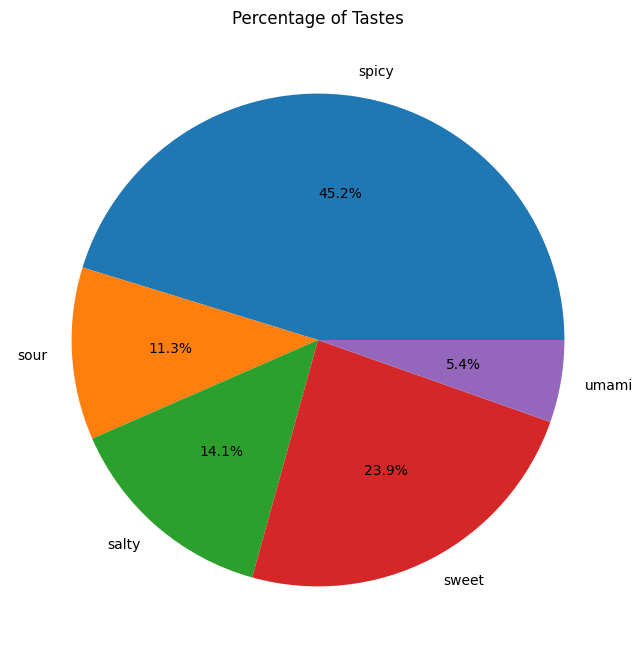

In [23]:
taste_counts = df[['spicy','sour','salty','sweet','umami']].sum()  # Calculate the sum of each column
total_tastes = taste_counts.sum()  # Calculate the total count of tastes
taste_percentages = (taste_counts / total_tastes) * 100  # Calculate the percentage

# Plot the pie chart
taste_percentages.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8))
plt.title('Percentage of Tastes')
# plt.ylabel('')  # Remove the y-label
plt.show()

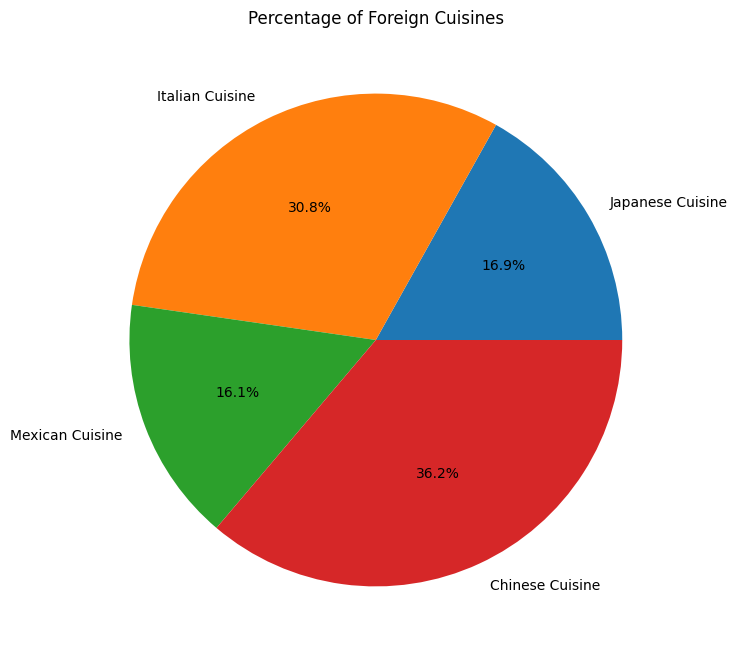

In [24]:
cuisine_counts = df[['Japanese Cuisine','Italian Cuisine','Mexican Cuisine','Chinese Cuisine']].sum()  # Calculate the sum of each column
total_cuisines = cuisine_counts.sum()  # Calculate the total count of tastes
taste_percentages = (cuisine_counts / total_cuisines) * 100  # Calculate the percentage

# Plot the pie chart
taste_percentages.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8))
plt.title('Percentage of Foreign Cuisines')
# plt.ylabel('')  # Remove the y-label
plt.show()

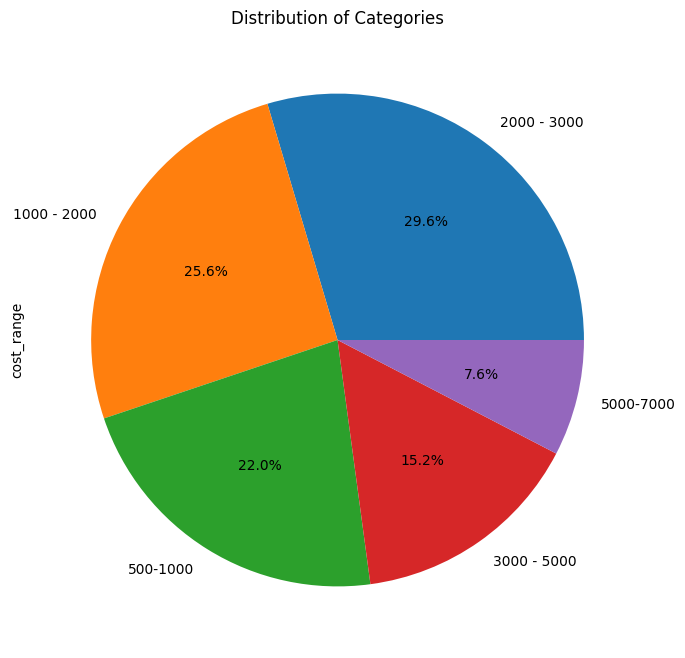

In [25]:
# Calculate the counts of each unique value in the 'category' column
category_counts = df['cost_range'].value_counts()

# Plot the pie chart
category_counts.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8))
plt.title('Distribution of Categories')
# plt.ylabel('')  # Remove the y-label
plt.show()

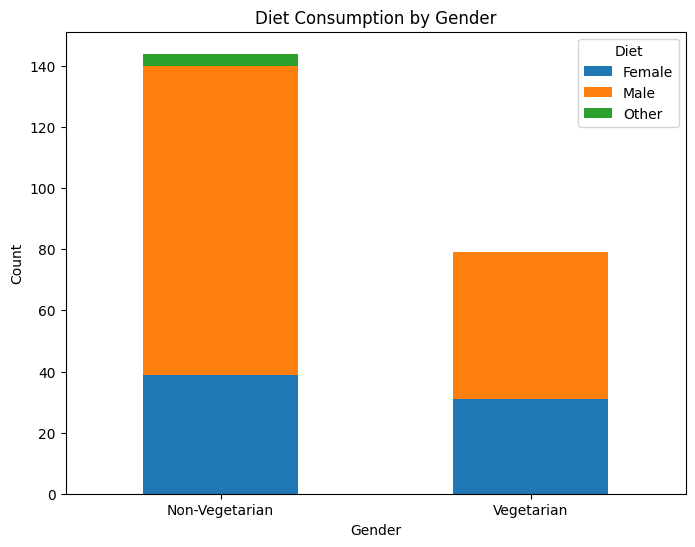

In [26]:
grouped = df[['type','Gender']].groupby(['type', 'Gender']).size().unstack(fill_value=0)

# Plot stacked bar graph
grouped.plot(kind='bar', stacked=True, figsize=(8, 6))

plt.title('Diet Consumption by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.legend(title='Diet')
plt.show()

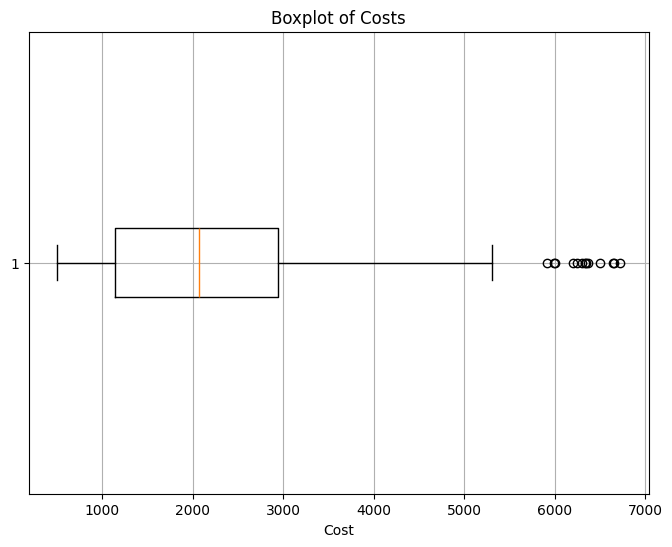

In [92]:
# Plot the boxplot
plt.figure(figsize=(8, 6))
plt.boxplot(df['cost'], vert=False)
plt.title('Boxplot of Costs')
plt.xlabel('Cost')
plt.grid(True)  # Add gridlines for better visualization
plt.show()

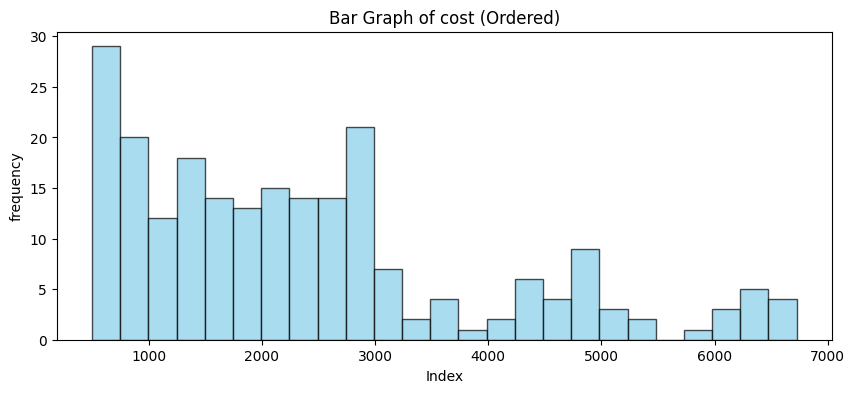

In [91]:
df_sorted = df.sort_values(by='cost')
plt.figure(figsize=(10,4))
index=np.arange(0,len(df),1)
hist, bins, _ =plt.hist( df_sorted['cost'],bins=25, color='skyblue',edgecolor='black',alpha=0.7)


plt.title('Bar Graph of cost (Ordered)')
plt.xlabel('Index')
plt.ylabel('frequency')
plt.show()

# Taste Preference

## Type of Diet

In [31]:
n_total=len(df)
print(n_total)

223


In [32]:
n_veg= df['type'].value_counts()['Vegetarian']
n_nonveg= df['type'].value_counts()['Non-Vegetarian']

In [33]:
print(n_veg,n_nonveg)

79 144


In [34]:
p_veg=n_veg/(n_veg+n_nonveg)
p_nonveg=n_nonveg/(n_veg+n_nonveg)
print(p_veg,n_veg*(1-p_veg))
print(p_nonveg,n_nonveg*(1-p_nonveg))

0.3542600896860987 51.01345291479821
0.6457399103139013 51.01345291479821


### sampling the distribution of difference of veg and non veg

In [35]:
mean=p_veg-p_nonveg
variance= (((p_veg*(1-p_veg))/n_veg)+((p_nonveg*(1-p_nonveg))/n_nonveg))**0.5

In [36]:
print(mean,variance)

-0.29147982062780264 0.0669649530182425


### confidence intervals with confidence 95%

In [37]:
alpha = 0.025  
z_critical = norm.ppf(1 - alpha)

In [38]:
print(f'CI for veg:({p_veg-z_critical*(((p_veg*(1-p_veg))/n_total))**0.5},{p_veg+z_critical*(((p_veg*(1-p_veg))/n_total)**0.5)})')
print(f'CI for Nonveg:({p_nonveg-z_critical*(((p_nonveg*(1-p_nonveg))/n_total))**0.5},{p_nonveg+z_critical*(((p_nonveg*(1-p_nonveg))/n_total))**0.5})')
print(f'CI for difference of veg-Nonveg:({(p_veg-p_nonveg)-z_critical*variance},{(p_veg-p_nonveg)+z_critical*variance})')

CI for veg:(0.2914852534904204,0.41703492588177693)
CI for Nonveg:(0.5829650741182231,0.7085147465095796)
CI for difference of veg-Nonveg:(-0.4227287167699747,-0.16023092448563056)


### For Different tastes

In [39]:
n_sweet=np.sum(df['sweet'])
n_salty=np.sum(df['salty'])
n_sour=np.sum(df['sour'])
n_spicy=np.sum(df['spicy'])
n_umami=np.sum(df['umami'])

p_sweet=n_sweet/n_total
p_salty=n_salty/n_total
p_sour=n_sour/n_total
p_spicy=n_spicy/n_total
p_umami=n_umami/n_total


In [40]:
print(n_salty,n_sour,n_spicy,n_sweet,n_umami,n_total)
print(p_salty,p_sour,p_spicy,p_sweet,p_umami)

55 44 176 93 21 223
0.24663677130044842 0.19730941704035873 0.7892376681614349 0.4170403587443946 0.09417040358744394


### Confidence interval with confidence 95%

In [41]:
print(f'CI for sweet:({p_sweet-z_critical*(((p_sweet*(1-p_sweet))/n_total))**0.5},{p_sweet+z_critical*(((p_sweet*(1-p_sweet))/n_total)**0.5)})')
print(f'CI for salty:({p_salty-z_critical*(((p_salty*(1-p_salty))/n_total))**0.5},{p_salty+z_critical*(((p_salty*(1-p_salty))/n_total)**0.5)})')
print(f'CI for sour:({p_sour-z_critical*(((p_sour*(1-p_sour))/n_total))**0.5},{p_sour+z_critical*(((p_sour*(1-p_sour))/n_total)**0.5)})')
print(f'CI for spicy:({p_spicy-z_critical*(((p_spicy*(1-p_spicy))/n_total))**0.5},{p_spicy+z_critical*(((p_spicy*(1-p_spicy))/n_total)**0.5)})')
print(f'CI for umami:({p_umami-z_critical*(((p_umami*(1-p_umami))/n_total))**0.5},{p_umami+z_critical*(((p_umami*(1-p_umami))/n_total)**0.5)})')


CI for sweet:(0.3523255090421601,0.4817552084466291)
CI for salty:(0.19006148217718016,0.3032120604237167)
CI for sour:(0.14507657580452368,0.24954225827619378)
CI for spicy:(0.7357078141054436,0.8427675222174262)
CI for umami:(0.055837110599996874,0.132503696574891)


### For Different Foreign Cusines


In [42]:
n_japanese=np.sum(df['Japanese Cuisine'])
n_mexican=np.sum(df['Mexican Cuisine'])
n_italian=np.sum(df['Italian Cuisine'])
n_chinese=np.sum(df['Chinese Cuisine'])

p_japanese=n_japanese/n_total
p_chinese=n_chinese/n_total
p_mexican=n_mexican/n_total
p_italian=n_italian/n_total
print(n_japanese,n_mexican,n_italian,n_chinese)
print(p_japanese,p_mexican,p_italian,p_chinese)

63 60 115 135
0.2825112107623318 0.26905829596412556 0.515695067264574 0.6053811659192825


In [43]:
print(f'CI for Japenese cuisine:({p_japanese-z_critical*(((p_japanese*(1-p_japanese))/n_total))**0.5},{p_japanese+z_critical*(((p_japanese*(1-p_japanese))/n_total)**0.5)})')
print(f'CI for chinese cuisine:({p_chinese-z_critical*(((p_chinese*(1-p_chinese))/n_total))**0.5},{p_chinese+z_critical*(((p_chinese*(1-p_chinese))/n_total)**0.5)})')
print(f'CI for mexican cuisine:({p_mexican-z_critical*(((p_mexican*(1-p_mexican))/n_total))**0.5},{p_mexican+z_critical*(((p_mexican*(1-p_mexican))/n_total)**0.5)})')
print(f'CI for italian cuisine:({p_italian-z_critical*(((p_italian*(1-p_italian))/n_total))**0.5},{p_italian+z_critical*(((p_italian*(1-p_italian))/n_total)**0.5)})')


CI for Japenese cuisine:(0.22342024846876526,0.34160217305589835)
CI for chinese cuisine:(0.5412308179028202,0.6695315139357447)
CI for mexican cuisine:(0.21085330530922164,0.3272632866190295)
CI for italian cuisine:(0.4501029583764671,0.581287176152681)


###  For desert preference

In [44]:
n1=df['dessert'].value_counts()['Yes, I love having dessert after every meal.']
n2=df['dessert'].value_counts()['Occasionally, depending on the occasion.']
n3=df['dessert'].value_counts()['No, I usually skip dessert after meals.']

p1=n1/n_total
p2=n2/n_total
p3=n3/n_total
print(n1,n2,n3)
print(p1,p2,p3)

81 116 26
0.3632286995515695 0.5201793721973094 0.11659192825112108


In [45]:
print(f'CI for option1:({p1-z_critical*(((p1*(1-p1))/n_total))**0.5},{p1+z_critical*(((p1*(1-p1))/n_total)**0.5)})')
print(f'CI for option1:({p2-z_critical*(((p2*(1-p2))/n_total))**0.5},{p2+z_critical*(((p2*(1-p2))/n_total)**0.5)})')
print(f'CI for option1:({p3-z_critical*(((p3*(1-p3))/n_total))**0.5},{p3+z_critical*(((p3*(1-p3))/n_total)**0.5)})')

CI for option1:(0.3001071752337587,0.4263502238693803)
CI for option1:(0.45460839138476683,0.5857503530098519)
CI for option1:(0.07446977309481329,0.15871408340742887)


### Cost

In [46]:
cost_mean=np.mean(df['cost'])
cost_var=df['cost'].var()
cost_var=cost_var**0.5
alpha=0.025
t_critical=t.ppf(1-alpha,n_total-1)

In [47]:
print(cost_mean,cost_var,t_critical)

2389.9417040358744 1574.758849323671 1.9707073953190277


In [48]:
print(f'CI for cost:({cost_mean-t_critical*(cost_var/n_total**0.5)},{cost_mean+t_critical*(cost_var/n_total**0.5)})')

CI for cost:(2182.1234114665785,2597.7599966051703)


### Adventurous

In [49]:
def group_ratings(rating):
    if rating in [0, 1, 2]:
        return '0-2'
    elif rating in [3, 4, 5]:
        return '3-5'
    elif rating in [6, 7, 8]:
        return '6-8'
    elif rating in [9, 10]:
        return '9-10'
    else:
        return 'Invalid'

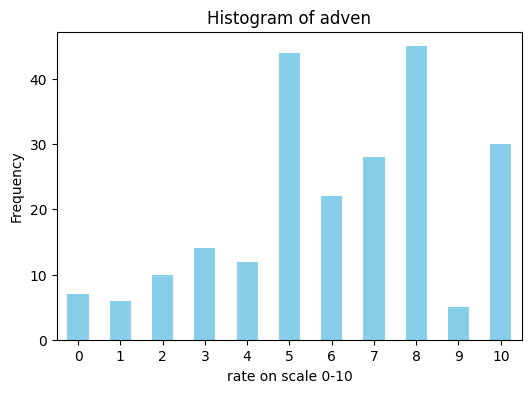

In [88]:
plt.figure(figsize=(6,4))
df['adven'].value_counts().sort_index().plot(kind='bar',color='skyblue')
plt.xlabel('rate on scale 0-10')
plt.ylabel('Frequency')
plt.title('Histogram of adven')
plt.xticks(rotation=0)
plt.show()

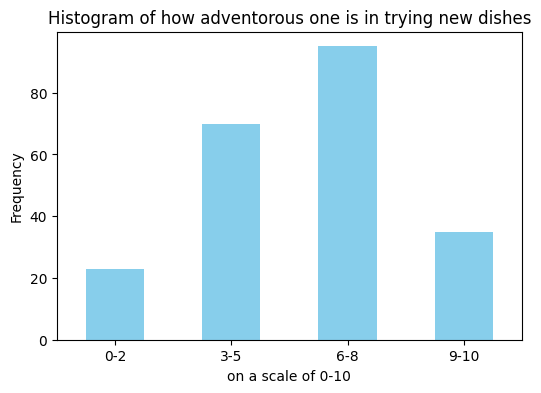

In [51]:
# Create a new column with grouped ratings
df['grouped_adven'] = df['adven'].apply(group_ratings)

# Plot histogram
plt.figure(figsize=(6, 4))
df['grouped_adven'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Histogram of how adventorous one is in trying new dishes')
plt.xlabel('on a scale of 0-10')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()


In [52]:
adven1=df[(df['adven']>=0) & (df['adven']<=2)]
stat1=adven1.describe()
stat1_count=stat1['cost']['count']
stat1_mean=stat1['cost']['mean']
stat1_std=stat1['cost']['std']
adven2=df[(df['adven']>=3) & (df['adven']<=5)]
stat2=adven2.describe()
stat2_count=stat2['cost']['count']
stat2_mean=stat2['cost']['mean']
stat2_std=stat2['cost']['std']
adven3=df[(df['adven']>=6) & (df['adven']<=8)]
stat3=adven3.describe()
stat3_count=stat3['cost']['count']
stat3_mean=stat3['cost']['mean']
stat3_std=stat3['cost']['std']
adven4=df[(df['adven']>=9) & (df['adven']<=10)]
stat4=adven4.describe()
stat4_count=stat4['cost']['count']
stat4_mean=stat4['cost']['mean']
stat4_std=stat4['cost']['std']

In [53]:
print(stat4['cost'])

count      35.000000
mean     2401.142857
std      1595.412359
min       500.000000
25%      1131.500000
50%      2219.000000
75%      2859.500000
max      6649.000000
Name: cost, dtype: float64


In [54]:
t_critical1=t.ppf(1-alpha,stat1_count-1)
print(t_critical1)
print(f'CI for very-low adventorous cost:({stat1_mean-t_critical1*(stat1_std/stat1_count**0.5)},{stat1_mean+t_critical1*(stat1_std/stat1_count**0.5)})')
t_critical2=t.ppf(1-alpha,stat2_count-1)
print(t_critical2)

print(f'CI for low adventorous cost:({stat2_mean-t_critical2*(stat2_std/stat2_count**0.5)},{stat2_mean+t_critical2*(stat2_std/stat2_count**0.5)})')

t_critical3=t.ppf(1-alpha,stat3_count-1)
print(t_critical3)

print(f'CI for Medium adventorous cost:({stat3_mean-t_critical3*(stat3_std/stat3_count**0.5)},{stat3_mean+t_critical3*(stat3_std/stat3_count**0.5)})')

t_critical4=t.ppf(1-alpha,stat4_count-1)
print(t_critical4)

print(f'CI for High adventorous cost:({stat4_mean-t_critical3*(stat4_std/stat4_count**0.5)},{stat4_mean+t_critical3*(stat4_std/stat4_count**0.5)})')

2.0738730679040147
CI for very-low adventorous cost:(2118.932637749208,3886.893449207314)
1.9949454146328136
CI for low adventorous cost:(1941.1685482862042,2658.4314517137964)
1.9855234417658298
CI for Medium adventorous cost:(2002.2332790094665,2605.4298788852707)
2.032244509317718
CI for High adventorous cost:(1865.6989897374906,2936.586724548224)


### Dine Out

In [55]:
df['dine_out'].describe()

count    223.000000
mean       2.726457
std        1.977707
min        0.000000
25%        1.000000
50%        2.000000
75%        4.000000
max        7.000000
Name: dine_out, dtype: float64

In [56]:
dine_mean=df['dine_out'].mean()
dine_var=df['dine_out'].std()
t_critical=t.ppf(1-alpha,n_total-1)
print(t_critical)
print(dine_mean,dine_var)
print(f'CI for dine_out:({dine_mean-t_critical*(dine_var/n_total**0.5)},{dine_mean+t_critical*(dine_var/n_total**0.5)})')

1.9707073953190277
2.726457399103139 1.977706722427203
CI for dine_out:(2.465462749392704,2.987452048813574)


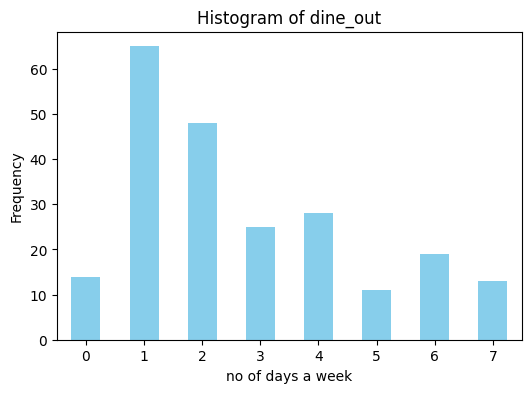

In [57]:
plt.figure(figsize=(6,4))
df['dine_out'].value_counts().sort_index().plot(kind='bar',color='skyblue')
plt.xlabel('no of days a week')
plt.ylabel('Frequency')
plt.title('Histogram of dine_out')
plt.xticks(rotation=0)
plt.show()

In [58]:
stat1['cost']

count      23.000000
mean     3002.913043
std      2044.204711
min       601.000000
25%      1226.000000
50%      2593.000000
75%      4862.000000
max      6726.000000
Name: cost, dtype: float64

## Hypothesis Testing

### Comparison of different region people preferring their region cuisine

In [59]:
n_southcuisine=len(df[(df['fav_cuisine_ind']=='South Indian Cuisine') & (df['pof']=='South India')])
n_northcuisine=len(df[(df['fav_cuisine_ind']=='North Indian Cuisine') & (df['pof']=='North India')])
n_south=len(df[df['pof']=='South India'])
n_north=len(df[df['pof']=='North India'])

In [60]:
print(n_south, n_north)
print(n_southcuisine, n_northcuisine)

131 87
109 42


In [61]:
p_south=n_southcuisine/n_south
p_north=n_northcuisine/n_north

var=(((p_south*(1-p_south))/n_south)+((p_north*(1-p_north))/n_north))**0.5
Z=(p_south-p_north)/var

In [62]:
print(p_south, p_north,Z)

0.8320610687022901 0.4827586206896552 5.567091302736651


In [83]:
alpha=0.05
z_critical=norm.ppf(1-alpha)
print(Z>z_critical)

True


In [84]:
print(1-norm.cdf(Z))
print(1-norm.cdf(Z)>alpha)

0.00833899723982301
False


### Comparison of no of vegeterians vs non-vegeterians preferring desert after meal

In [65]:
n_vp=((df['type']=='Vegetarian' )& (df['dessert']=='Yes, I love having dessert after every meal.')).sum()
n_nvp=((df['type']=='Non-Vegetarian' )& (df['dessert']=='Yes, I love having dessert after every meal.')).sum()

In [66]:
print(n_veg,n_vp)
print(n_nonveg,n_nvp)

79 37
144 44


In [67]:
p_vp=n_vp/n_veg
p_nvp=n_nvp/n_nonveg
var1=(p_vp*(1-p_vp))/n_veg
var2=(p_nvp*(1-p_nvp))/n_nonveg
var=(var1+var2)
Z=(p_vp-p_nvp)/var**0.5

In [68]:
print(p_vp, p_nvp, var1, var2, var, Z)

0.46835443037974683 0.3055555555555556 0.0031518804800431607 0.00147355109739369 0.004625431577436851 2.3937305828924456


In [81]:
alpha=0.05
z_critical=norm.ppf(1-alpha)
print(z_critical)
print(Z>z_critical)

1.6448536269514722
True


In [82]:
print(1-norm.cdf(Z))
print(1-norm.cdf(Z)>alpha)

0.00833899723982301
False


### Comparing Average amount on food per month by males vs females 

In [71]:
n_male=df['Gender'].value_counts()['Male']
n_female=df['Gender'].value_counts()['Female']
males=df[df['Gender']=='Male']
mean_male=males['cost'].mean()
females=df[df['Gender']=='Female']
mean_female=females['cost'].mean()
var_male=males['cost'].std()
var_female=females['cost'].std()
print(mean_male,mean_female)
print(var_male,var_female)
print(n_male,n_female)

2222.6174496644294 2667.8285714285716
1461.5989837000136 1756.1376507686418
149 70


In [72]:
x1=(var_male**2)*(n_male-1)
x2=(var_female**2)*(n_female-1)
x=x1+x2
S_p=(x/(n_male+n_female-2))**0.5
T=(mean_female-mean_male)/(S_p*(((1/n_female)+(1/n_male)))**0.5)
print(S_p,T)

1561.2908772546398 1.9678966188800449


In [73]:
t_critical=t.ppf(0.95,n_male+n_female-2)
print(T>t_critical)

True


### Comparison of no of times people dine out among male and female in south India

In [74]:
males_south=df[(df['Gender']=='Male') & (df['pof']=='South India')]
females_south=df[(df['Gender']=='Female') & (df['pof']=='South India')]

n_male_south=len(males_south)
n_female_south=len(females_south)

mean_male_south=males_south['dine_out'].mean()
mean_female_south=females_south['dine_out'].mean()

var_male_south=males_south['dine_out'].std()
var_female_south=females_south['dine_out'].std()
print(var_male_south,var_female_south)

1.7237099812049883 2.1204273440068917


In [75]:
S_p=(((var_male_south**0.5)*(n_male_south-1)+(var_female_south**0.5)*(n_female_south-1))/(n_male_south+n_female_south-2))**0.5
T=(mean_female_south-mean_male_south)/(S_p*(((1/n_female_south)+(1/n_male_south)))**0.5)
t_critical=t.ppf(0.95,n_male_south+n_female_south-2)
print(T>t_critical)

True


In [76]:
males_north=df[(df['Gender']=='Male') & (df['pof']=='North India')]
females_north=df[(df['Gender']=='Female') & (df['pof']=='North India')]

n_male_north=len(males_north)
n_female_north=len(females_north)

mean_male_north=males_north['dine_out'].mean()
mean_female_north=females_north['dine_out'].mean()

var_male_north=males_north['dine_out'].std()
var_female_north=females_north['dine_out'].std()
print(var_male_north,var_female_north)

1.8162591802399053 2.1974010622941433


In [77]:
S_p=(((var_male_north**0.5)*(n_male_north-1)+(var_female_north**0.5)*(n_female_north-1))/(n_male_north+n_female_north-2))**0.5
T=(mean_female_north-mean_male_north)/(S_p*(((1/n_female_north)+(1/n_male_north)))**0.5)
t_critical=t.ppf(0.95,n_male_north+n_female_north-2)
print(T>t_critical)

True


In [78]:
north_veg=len(df[(df['pof']=='North India') & (df['type']=='Vegetarian')])
north_nonveg=len(df[(df['pof']=='North India') & (df['type']=='Non-Vegetarian')])
south_veg=len(df[(df['pof']=='South India') & (df['type']=='Vegetarian')])
south_nonveg=len(df[(df['pof']=='South India') & (df['type']=='Non-Vegetarian')])
print(north_veg,north_nonveg,south_veg,south_nonveg)

45 42 31 100


In [79]:
print(n_japanese,n_total)

63 223


### Test For Independence

In [80]:
# Function to calculate expected counts
def calculate_expected(observed):
    row_totals = np.sum(observed, axis=1)
    col_totals = np.sum(observed, axis=0)
    grand_total = np.sum(observed)
    expected = np.outer(row_totals, col_totals) / grand_total
    return expected

# Function to perform chi-square test
def chi_square_test(observed):
    expected = calculate_expected(observed)
    chi2_statistic = np.sum((observed - expected)**2 / expected)
    degrees_of_freedom = (observed.shape[0] - 1) * (observed.shape[1] - 1)
    return chi2_statistic, degrees_of_freedom



# Sample data (replace this with your actual data)
observed = np.array([
    [north_veg, north_nonveg],  # North
    [south_veg, south_nonveg]   # South
])

# Perform chi-square test
chi2_statistic, degrees_of_freedom = chi_square_test(observed)

# Output results
print("Chi-square statistic:", chi2_statistic)
print("Degrees of freedom:", degrees_of_freedom)

# Critical value at alpha = 0.05
alpha = 0.05
critical_value =  chi2_contingency(observed)[0]

# Interpretation
if chi2_statistic <= critical_value:
    print("\nFail to reject the null hypothesis. There is no significant association between the variables.")
else:
    print("\nReject the null hypothesis. There is a significant association between the variables.")

Chi-square statistic: 18.12679100328966
Degrees of freedom: 1

Reject the null hypothesis. There is a significant association between the variables.
